# Step 1: Install + Import Code

In [1]:
# 📌 Install required libraries
!pip install transformers torch pillow datasets

# ✅ Import libraries
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Step 2: Load the Pretrained CLIP Model & Processor

In [5]:
# ✅ Load the pretrained CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

print("Model and processor loaded successfully!")

Model and processor loaded successfully!


# Step 3: Load an Image & Define Text Prompts

In [18]:
import io
from PIL import Image
import requests

# Use a public image URL
image_url = "https://images.unsplash.com/photo-1518791841217-8f162f1e1131"

response = requests.get(image_url)
if response.status_code == 200:
    image = Image.open(io.BytesIO(response.content))
    image.show()
else:
    print("Failed to download image:", response.status_code)


In [23]:
# 📷 Load an image from URL
image = Image.open(requests.get(image_url, stream=True).raw)
image.show()

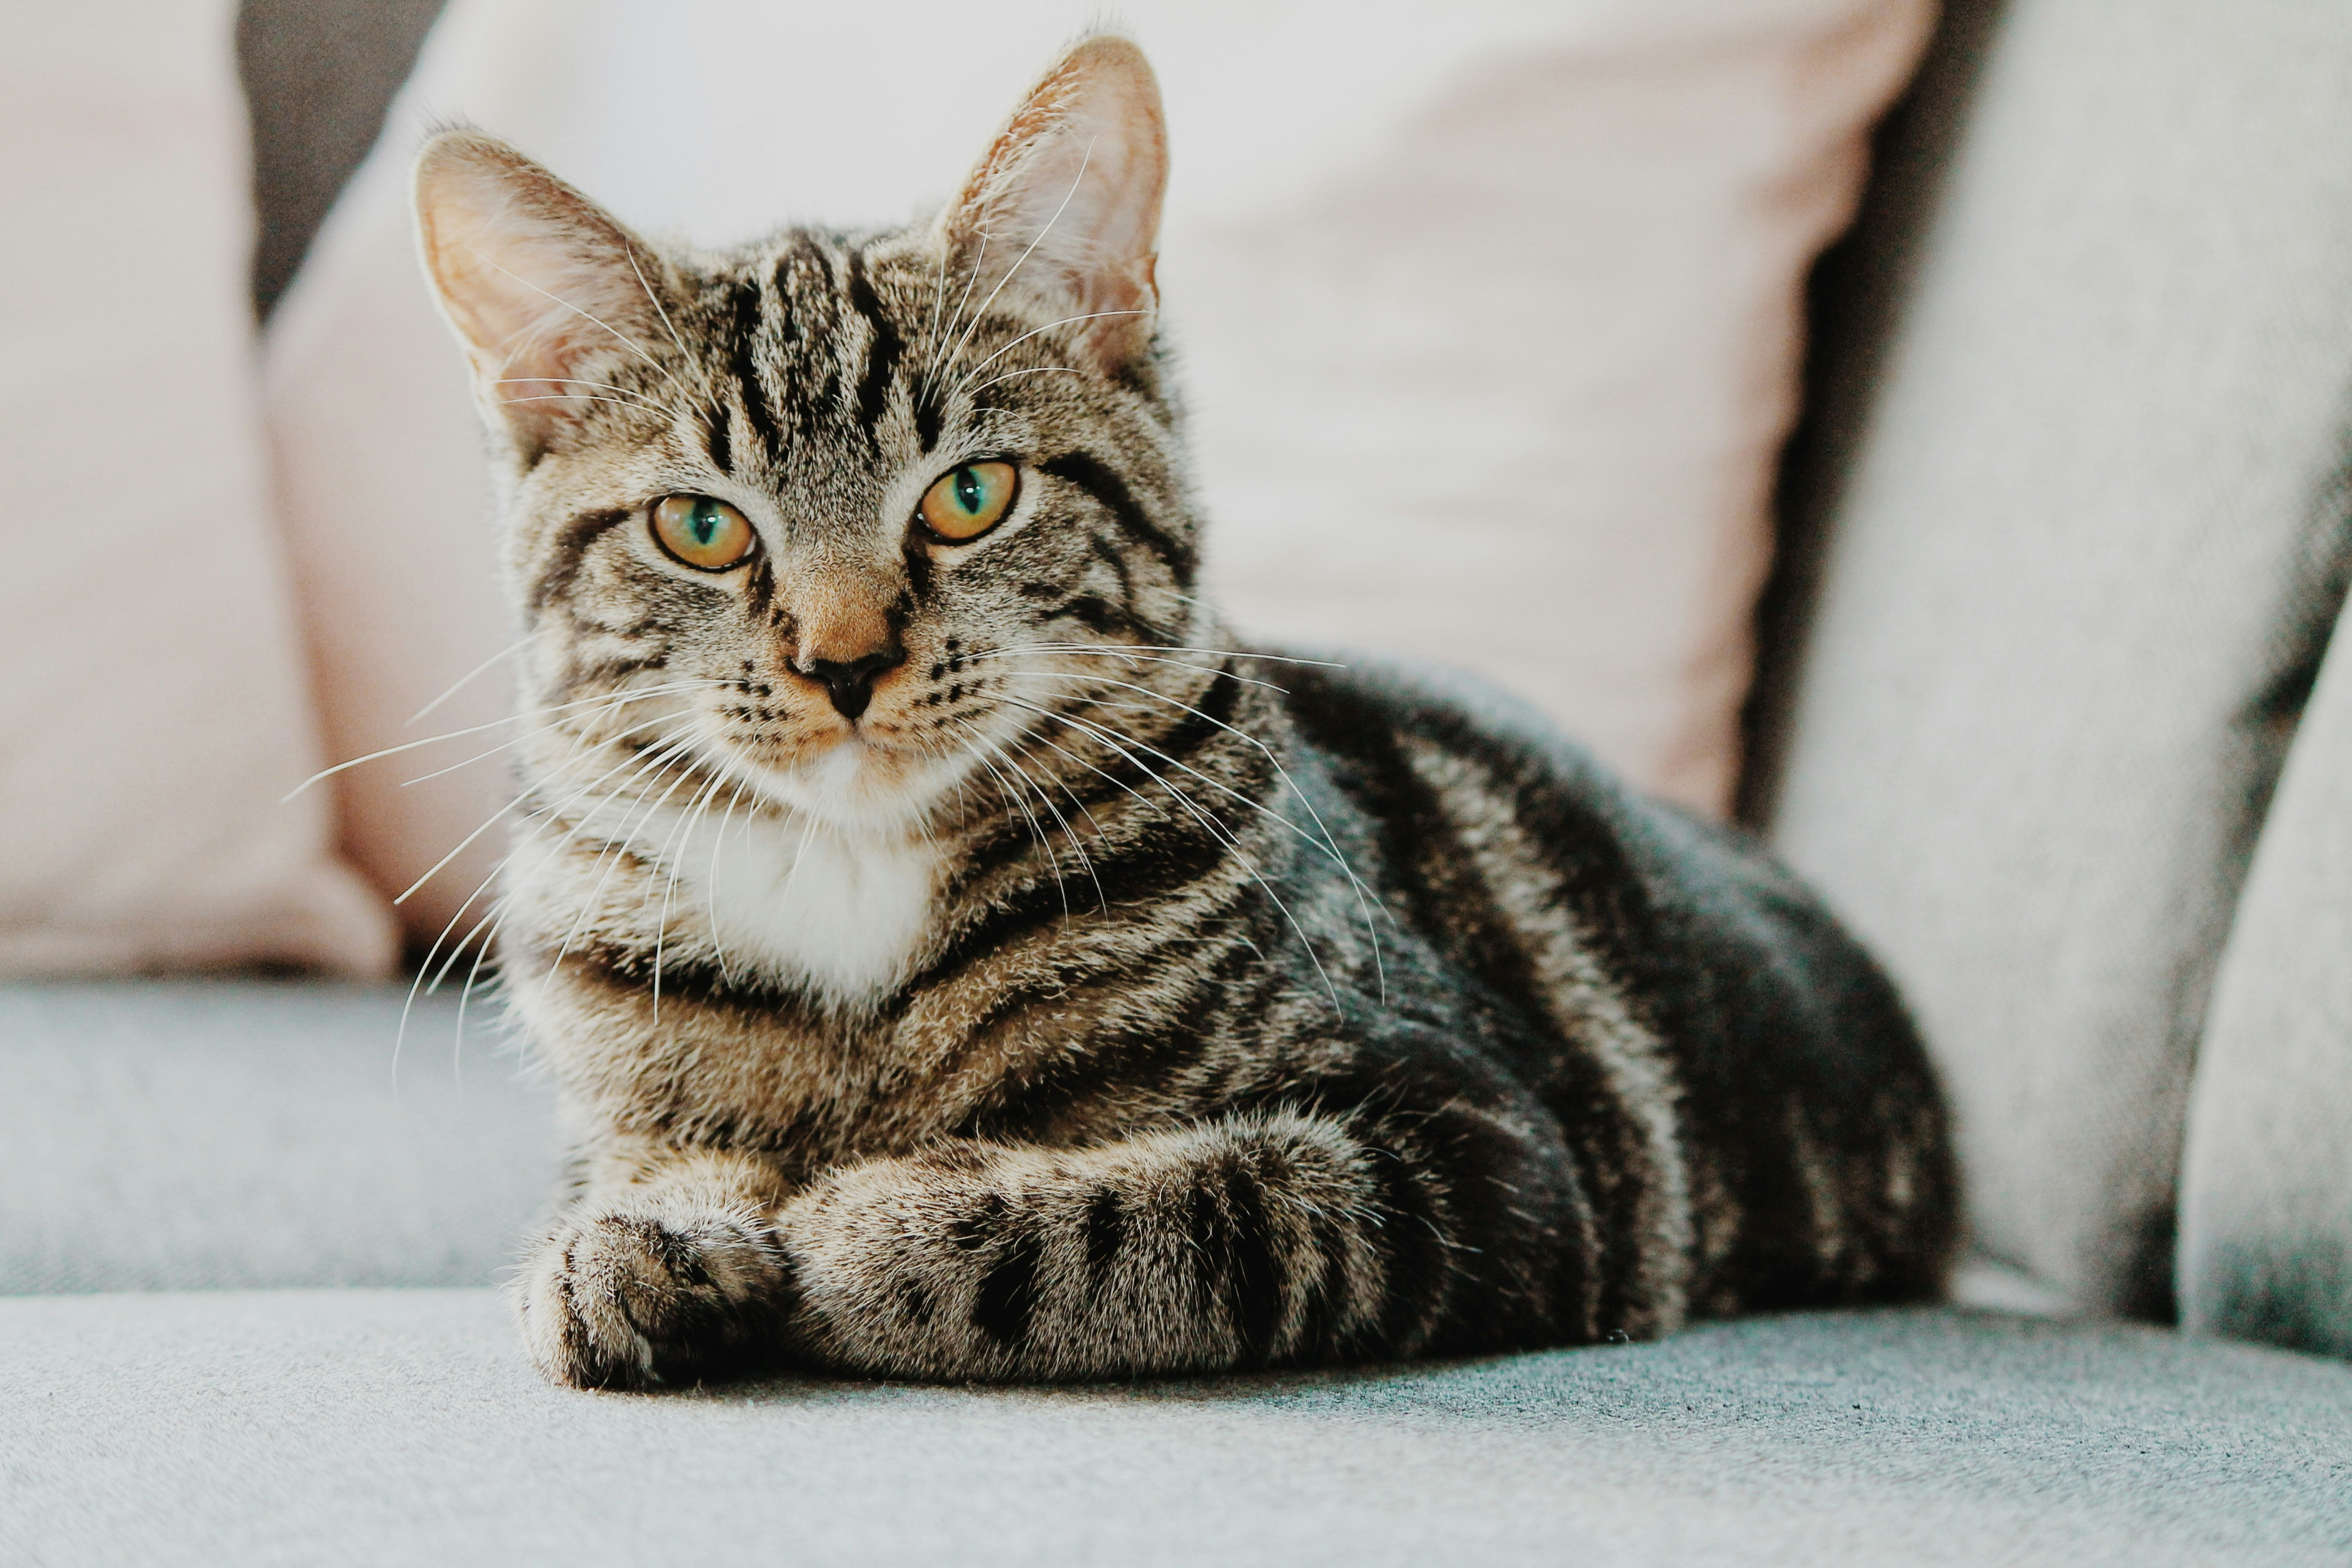

# Step 4: Encode Inputs & Get Predictions

In [20]:
# 📝 Define some candidate text prompts
texts = ["a photo of a cat", "a photo of a dog", "a photo of a horse", "a photo of a rabbit"]

# 🔄 Process image and text using the processor
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

# 🧠 Run inference through the model
outputs = model(**inputs)

# 🎯 Extract logits (similarity scores between image and text)
logits_per_image = outputs.logits_per_image

# 🔢 Convert logits to probabilities
probs = logits_per_image.softmax(dim=1)

# 🖨️ Print predictions
for text, prob in zip(texts, probs[0]):
    print(f"{text}: {prob.item():.4f}")


a photo of a cat: 0.9866
a photo of a dog: 0.0057
a photo of a horse: 0.0003
a photo of a rabbit: 0.0073


# Step 5: Load BLIP Model + Processor

In [21]:
from transformers import BlipProcessor, BlipForConditionalGeneration

# ✅ Load pretrained BLIP processor and model
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

print("BLIP model and processor loaded successfully!")


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

BLIP model and processor loaded successfully!


# Step 6: Generate Caption for the Image

In [22]:
# 🔄 Process the image for BLIP
inputs = blip_processor(images=image, return_tensors="pt")

# 🧠 Generate caption
output = blip_model.generate(**inputs)

# 🖨️ Decode and print caption
caption = blip_processor.decode(output[0], skip_special_tokens=True)
print("Generated caption:", caption)


Generated caption: a cat sitting on a couch with a pink pillow


# Step 7: Load BLIP-2 Model + Processor

In [24]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration

# ✅ Load BLIP-2 processor and model (optimum pretrained checkpoint)
blip2_processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
blip2_model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b")

print("BLIP-2 model and processor loaded successfully!")


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/122k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

BLIP-2 model and processor loaded successfully!


In [25]:
blip2_processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
blip2_model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl")

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/128k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

# Step 8 : Generate Caption with BLIP-2

In [26]:
# Process the image
inputs = blip2_processor(images=image, return_tensors="pt")

# Generate caption
output = blip2_model.generate(**inputs, max_new_tokens=50)

# Decode and print caption
caption = blip2_processor.decode(output[0], skip_special_tokens=True)
print("BLIP-2 Generated caption:", caption)

BLIP-2 Generated caption: a tabby cat is sitting on a couch


# Step 9: Visual Question Answering (VQA)

In [27]:
# Define your question
question = "What animal is in the picture?"

# Process image + question
inputs = blip2_processor(images=image, text=question, return_tensors="pt")

# Generate answer
output = blip2_model.generate(**inputs, max_new_tokens=50)

# Decode and print answer
answer = blip2_processor.decode(output[0], skip_special_tokens=True)
print(f"Q: {question}")
print(f"A: {answer}")

Q: What animal is in the picture?
A: cat
